# Customer analysis

We have a list of customers with their personal information and their behaviour.

We want to launch a new luxury and expensive product. 

Which customers should we target with personalized marketing?

# Task
- Perform basic data analysis and visualization
- Perform data editing (encoding)
- Select appropriate variables by which to segment customers
- Create a k-means model with an appropriate number of segments
- Visualize the model
- Which segment is the target segment?

# Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [2]:
data=pd.read_csv('..\\dataset\\Mall_Customers.csv')

# Data description
- Information about the data
- Data preview
- Basic statistics
- View data distribution

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- Data Preview ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Basi

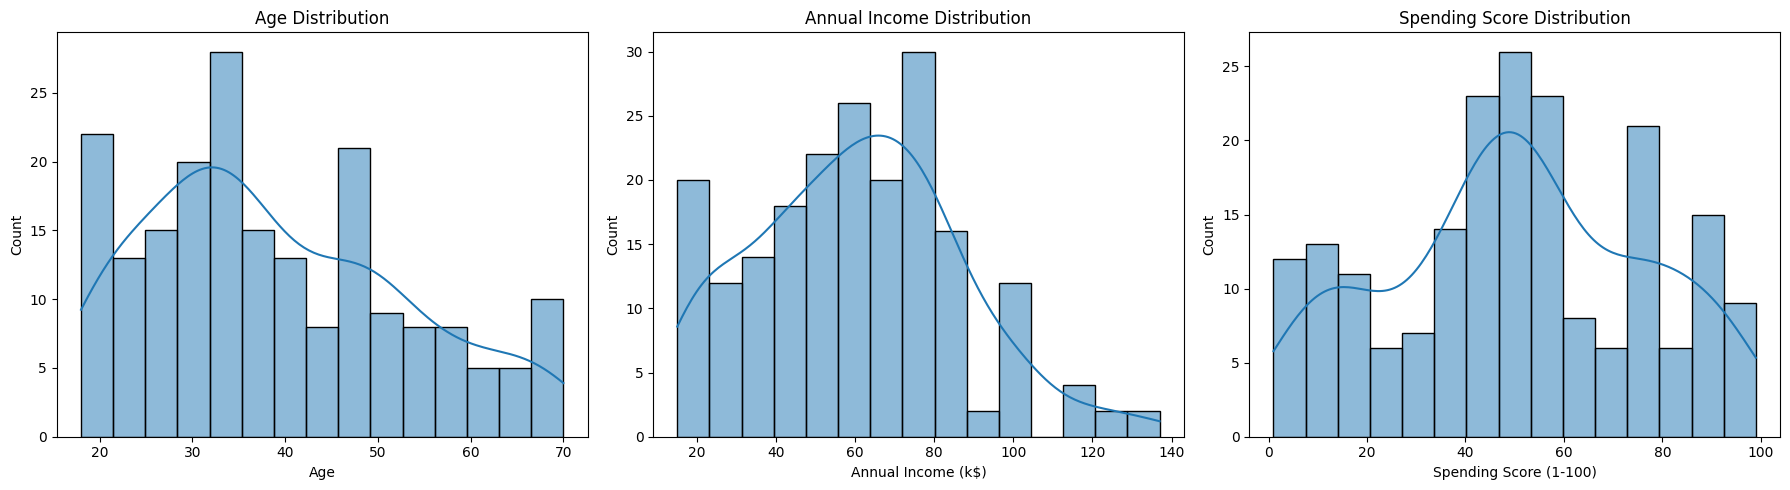

In [3]:
print("--- Data Information ---")
data.info()

print("\n--- Data Preview ---")
print(data.head())

print("\n--- Basic Statistics ---")
print(data.describe())

print("\n--- View Data Distribution ---")
# Plotting distributions for key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Age'], bins=15, kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, ax=axes[1]).set_title('Annual Income Distribution')
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, ax=axes[2]).set_title('Spending Score Distribution')
plt.tight_layout()
plt.show()


# Data preparation
- Treatment of NaN values
- Encoding text columns

In [4]:
# --- Treatment of NaN values ---
print("NaN Check:")
print(data.isnull().sum())
# If NaN values exist, fill them (e.g., data = data.fillna(data.mean()) or drop them).

# --- Encoding text columns (Gender) ---
# Label Encoding to convert Gender (Male/Female) into numerical format (0/1)
le = LabelEncoder()
data['Gender_Encoded'] = le.fit_transform(data['Gender'])

print("\nGender Encoding Complete:")
print(data[['Gender', 'Gender_Encoded']].head())

NaN Check:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Gender Encoding Complete:
   Gender  Gender_Encoded
0    Male               1
1    Male               1
2  Female               0
3  Female               0
4  Female               0


# Variable selection
- Displaying relationships between variables (pairplot)
- We are looking for a combination of variables that can be visually divided into groups
- Creating an X with only these columns

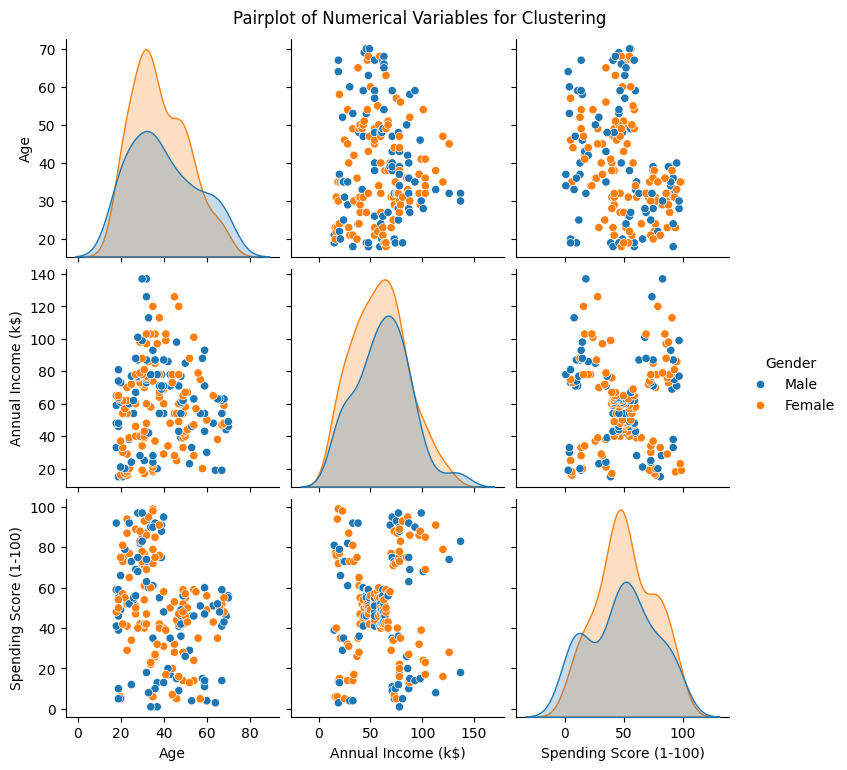

✅ Variable X created with columns: ['Annual Income (k$)', 'Spending Score (1-100)']


In [5]:
# --- Displaying relationships between variables (pairplot) ---
# Visual inspection to find variables that cluster well
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')
plt.suptitle('Pairplot of Numerical Variables for Clustering', y=1.02)
plt.show()

# --- Creating an X with only these columns ---
# Based on common practice and visual inspection, 'Annual Income' and 'Spending Score' 
# provide the best separation for marketing segmentation.
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

print(f"✅ Variable X created with columns: {list(data[['Annual Income (k$)', 'Spending Score (1-100)']].columns)}")



# Finding the k-mean model parameter
- Plotting elbow graph
- Finding the ideal number of clusters

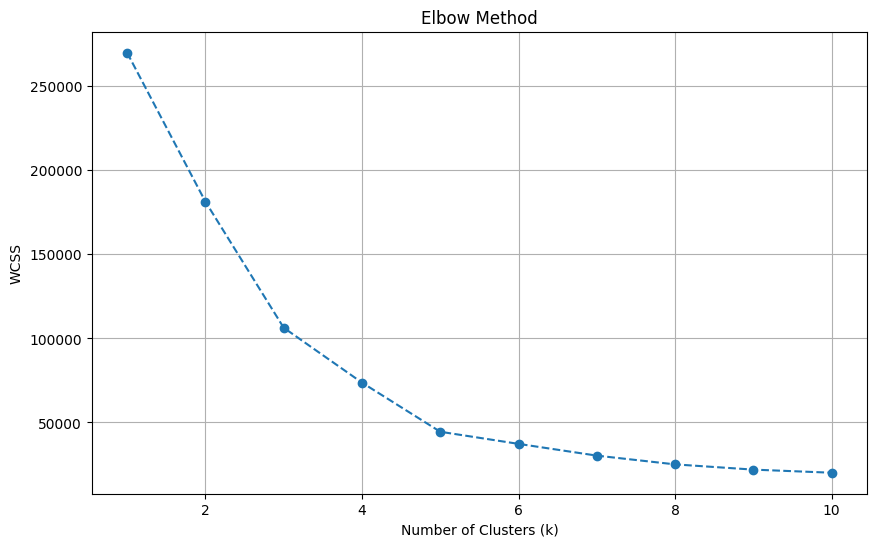

✅ Ideal number of clusters (k) determined as: 5 (based on the Elbow point)


In [6]:
# --- Plotting elbow graph ---
# Calculate Within-Cluster Sum of Squares (WCSS) for different k values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# --- Finding the ideal number of clusters ---
# The ideal number of clusters (k) is where the curve sharply changes its slope (the 'elbow').
# For this dataset, k=5 is typically the ideal number.
k_ideal = 5
print(f"✅ Ideal number of clusters (k) determined as: {k_ideal} (based on the Elbow point)")


# k-mean model for the observed number of clusters
- Training the model
- Data prediction

In [7]:
k_ideal = 5 # Using k=5 from the Elbow Method

# Train the K-Means Model
kmeans = KMeans(n_clusters=k_ideal, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X) # Predicts cluster labels

# Store cluster centers (Centroids)
centers = kmeans.cluster_centers_

# Add cluster labels back to the main DataFrame
data['Cluster'] = y_kmeans

print(f"✅ K-Means Model created and trained with k={k_ideal} clusters.")
print("\nFirst 5 rows with new Cluster column:")
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())


✅ K-Means Model created and trained with k=5 clusters.

First 5 rows with new Cluster column:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


# Visualization of the model
- Rendering of coloured groups of graphs

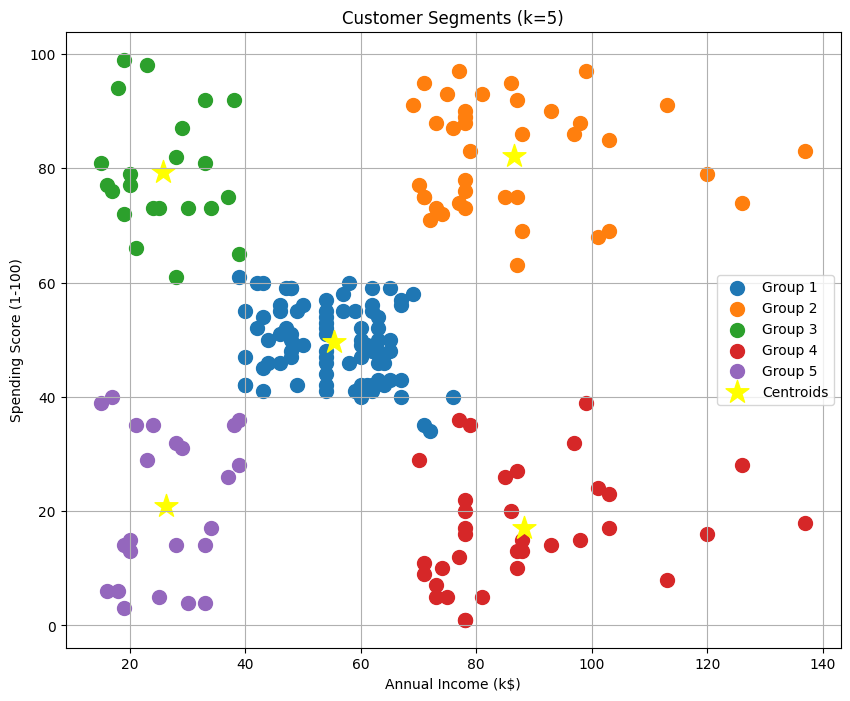

In [8]:
# --- Visualization of the model (Rendering of coloured groups of graphs) ---
plt.figure(figsize=(10, 8))

# Scatter plot each cluster with different colors
for i in range(k_ideal):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, label=f'Group {i+1}')

# Plot the Centroids
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='yellow', marker='*', label='Centroids')

plt.title(f'Customer Segments (k={k_ideal})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation of the model
- Describe each group
- Which customers to target?

In [9]:
print("\n--- Describe each group (Cluster Summary) ---")
# Analyze the mean values for Income, Spending, and Age for each cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print(cluster_summary)

# --- Which customers to target? ---
print("\n--- TARGET CUSTOMER IDENTIFICATION FOR LUXURY PRODUCT ---")

# The target for an expensive/luxury product should be the segment with 
# HIGH ANNUAL INCOME and HIGH SPENDING SCORE.
# (This typically corresponds to the top-right cluster in the visualization).

# Based on the summary (assuming Cluster 3 or 4 represents the top-right group):
print("Target Segment Recommendation:")
print("The ideal customers to target are the segment exhibiting **High Annual Income** and **High Spending Score** (The group in the top-right corner of the scatter plot).")
print("These customers have both the financial capacity and the willingness to spend on premium and luxury items.")


--- Describe each group (Cluster Summary) ---
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391

--- TARGET CUSTOMER IDENTIFICATION FOR LUXURY PRODUCT ---
Target Segment Recommendation:
The ideal customers to target are the segment exhibiting **High Annual Income** and **High Spending Score** (The group in the top-right corner of the scatter plot).
These customers have both the financial capacity and the willingness to spend on premium and luxury items.
